In [ ]:
import os
base_dir = "/content/drive/MyDrive/CNN_Image4_5/koridor-lt4-classify-main"
train_dir = os.path.join(base_dir, 'training_set')
validation_dir = os.path.join(base_dir, 'test_set')
test_dir = os.path.join(base_dir, 'single_prediction')
folders=os.listdir(train_dir)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(100, 50),
batch_size=32)
validation_generator = val_datagen.flow_from_directory(
validation_dir,
target_size=(100, 50),
batch_size=32)

Found 5839 images belonging to 8 classes.
Found 2576 images belonging to 8 classes.


In [ ]:
class_names_train = train_generator.class_indices
class_names_validation = validation_generator.class_indices

print("Nama Kelas Train:", class_names_train)
print("Nama Kelas Validation:", class_names_validation)


Nama Kelas Train: {'apar': 0, 'kelas': 1, 'koridor': 2, 'lift': 3, 'orang': 4, 'pintu_darurat': 5, 'pintu_ruang': 6, 'tangga': 7}
Nama Kelas Validation: {'apar': 0, 'kelas': 1, 'koridor': 2, 'lift': 3, 'orang': 4, 'pintu_darurat': 5, 'pintu_ruang': 6, 'tangga': 7}


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
img_input = layers.Input(shape=(100, 50, 3))
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(50, activation='sigmoid')(x)
output = layers.Dense(8, activation='softmax')(x)
model = Model(img_input, output)
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['acc'])


In [ ]:
history = model.fit_generator(
train_generator,
steps_per_epoch=182,
epochs=100,
validation_data=validation_generator,
validation_steps=80,
verbose=2)

<ipython-input-19-ad4a59a6b160>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
182/182 - 65s - loss: 0.1204 - acc: 0.0472 - val_loss: 0.1148 - val_acc: 0.0098 - 65s/epoch - 355ms/step
Epoch 2/100
182/182 - 44s - loss: 0.1104 - acc: 0.1877 - val_loss: 0.1057 - val_acc: 0.2082 - 44s/epoch - 241ms/step
Epoch 3/100
182/182 - 50s - loss: 0.1008 - acc: 0.2976 - val_loss: 0.0957 - val_acc: 0.4402 - 50s/epoch - 277ms/step
Epoch 4/100
182/182 - 56s - loss: 0.0945 - acc: 0.4336 - val_loss: 0.0928 - val_acc: 0.4430 - 56s/epoch - 309ms/step
Epoch 5/100
182/182 - 43s - loss: 0.0933 - acc: 0.4338 - val_loss: 0.0920 - val_acc: 0.4449 - 43s/epoch - 238ms/step
Epoch 6/100
182/182 - 45s - loss: 0.0928 - acc: 0.4329 - val_loss: 0.0914 - val_acc: 0.4445 - 45s/epoch - 249ms/step
Epoch 7/100
182/182 - 50s - loss: 0.0922 - acc: 0.4338 - val_loss: 0.0908 - val_acc: 0.4441 - 50s/epoch - 276ms/step
Epoch 8/100
182/182 - 44s - loss: 0.0916 - acc: 0.4336 - val_loss: 0.0901 - val_acc: 0.4449 - 44s/epoch - 242ms/step
Epoch 9/100
182/182 - 52s - loss: 0.0911 - acc: 0.4333 - val_los

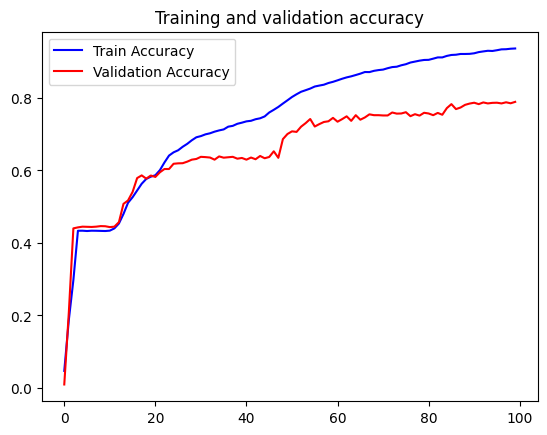

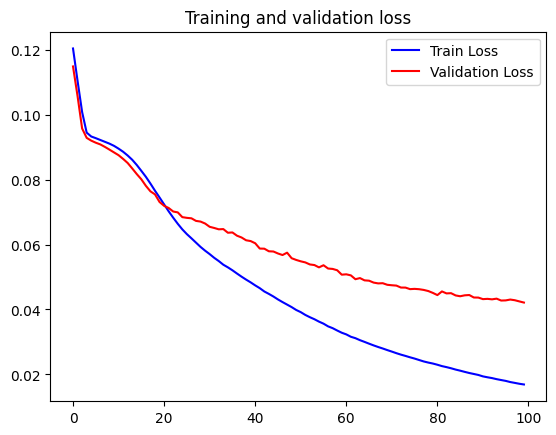

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, color='b', label='Train Accuracy')
plt.plot(epochs, val_acc, color='r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, color='b', label='Train Loss')
plt.plot(epochs, val_loss, color='r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
model.save("CNN.h5")
print(model.metrics_names)

['loss', 'acc']


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img = load_img('/content/drive/MyDrive/CNN_Image4_5/koridor-lt4-classify-main/single_prediction/lift2.jpg', False, target_size=(100,50))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)
print("\nPredicted :", index_preds)

1/1 [==============================] - 0s 212ms/step
Nilai Output Units:
 [[0.01200041 0.17478848 0.01660292 0.6939902  0.05068827 0.01280536
  0.00522798 0.03389641]]

Predicted : 3


In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img = load_img('/content/drive/MyDrive/CNN_Image4_5/koridor-lt4-classify-main/single_prediction/apar.jpg', False, target_size=(100,50))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)
print("\nPredicted :", index_preds)

1/1 [==============================] - 0s 37ms/step
Nilai Output Units:
 [[3.2869717e-03 4.3286558e-02 8.5781330e-01 3.7826054e-02 5.0513007e-02
  8.4656023e-04 3.5198713e-03 2.9076599e-03]]

Predicted : 2


In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img = load_img('/content/drive/MyDrive/CNN_Image4_5/koridor-lt4-classify-main/single_prediction/koridor2.jpg', False, target_size=(100,50))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)
print("\nPredicted :", index_preds)

1/1 [==============================] - 0s 30ms/step
Nilai Output Units:
 [[0.00281124 0.08900591 0.81607294 0.0363622  0.01008226 0.01920047
  0.01862831 0.00783667]]

Predicted : 2


In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img = load_img('/content/drive/MyDrive/CNN_Image4_5/koridor-lt4-classify-main/single_prediction/orang2.jpg', False, target_size=(100,50))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)
print("\nPredicted :", index_preds)

1/1 [==============================] - 0s 17ms/step
Nilai Output Units:
 [[0.00433268 0.02083785 0.04258682 0.03877524 0.867152   0.00396623
  0.01931831 0.00303099]]

Predicted : 4


In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img = load_img('/content/drive/MyDrive/CNN_Image4_5/koridor-lt4-classify-main/single_prediction/pintu_darurat.jpg', False, target_size=(100,50))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)
print("\nPredicted :", index_preds)

1/1 [==============================] - 0s 28ms/step
Nilai Output Units:
 [[0.0076678  0.07125185 0.02327123 0.04817224 0.03950533 0.7096797
  0.05916364 0.04128814]]

Predicted : 5


In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
img = load_img('/content/drive/MyDrive/CNN_Image4_5/koridor-lt4-classify-main/single_prediction/tangga2.jpg', False, target_size=(100,50))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
print("Nilai Output Units:\n", preds)
index_preds = np.argmax(preds)
print("\nPredicted :", index_preds)


1/1 [==============================] - 0s 21ms/step
Nilai Output Units:
 [[0.00313242 0.03387336 0.01484561 0.02504593 0.00596474 0.01442231
  0.03334374 0.86937183]]

Predicted : 7
